# 6. Rețele neuronale în Pytorch

In [3]:
import numpy as np
import torch

x = torch.rand(5, 3)
print(x)

tensor([[0.2252, 0.5629, 0.1778],
        [0.0730, 0.7362, 0.9734],
        [0.0144, 0.7123, 0.9587],
        [0.0410, 0.8558, 0.1417],
        [0.6122, 0.9172, 0.7144]])


In [4]:
torch.cuda.is_available()

True

In [5]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(28 * 28, 512)
        self.second_layer = nn.Linear(512, 512)
        self.output_layer = nn.Linear(512, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.first_layer(x))
        x = F.relu(self.second_layer(x))
        x = self.output_layer(x)
        return x


In [9]:
model = NeuralNetwork()
model.forward(torch.rand(1, 1, 28, 28))

tensor([[-0.0589,  0.0762, -0.0152, -0.0958, -0.0203,  0.0205, -0.0131, -0.1055,
          0.1049,  0.0916]], grad_fn=<AddmmBackward0>)

In [10]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [11]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [12]:
train_dataloader = DataLoader(train_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [13]:
model = NeuralNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)


In [14]:
NUM_EPOCHS = 10
device = "cuda" if torch.cuda.is_available() else "cpu" # decidem device-ul pe care sa il folosim
model = model.to(device)
loss_function = nn.CrossEntropyLoss() # functia ce trebuie optimizata, cross entropia

model.train(True)
for i in range(NUM_EPOCHS):
    print(f"=== Epoch {i+1} ===")
    for batch_index, (image_batch, labels_batch) in enumerate(train_dataloader): # iteram prin batchuri
        
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device) #(batch_size, )

        pred = model(image_batch) # procesam imaginile prin retea

        loss = loss_function(pred, labels_batch) # determinam functia de pieredere folosind outputul si label-urile reale ale exemplelor de antrenare
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward() # backpropagation
        optimizer.step() # optimizam parametrii retelei
        if batch_index % 100 == 0:
            loss = loss.item()
            print(f"Batch index {batch_index }, loss: {loss:>7f}")

=== Epoch 1 ===
Batch index 0, loss: 2.308888
Batch index 100, loss: 2.251171
Batch index 200, loss: 2.213441
Batch index 300, loss: 2.009576
Batch index 400, loss: 1.864805
Batch index 500, loss: 1.554002
Batch index 600, loss: 1.168813
Batch index 700, loss: 1.093413
Batch index 800, loss: 0.855344
Batch index 900, loss: 0.700984
=== Epoch 2 ===
Batch index 0, loss: 0.731049
Batch index 100, loss: 0.540947
Batch index 200, loss: 0.549399
Batch index 300, loss: 0.510092
Batch index 400, loss: 0.472078
Batch index 500, loss: 0.451793
Batch index 600, loss: 0.338783
Batch index 700, loss: 0.514016
Batch index 800, loss: 0.471192
Batch index 900, loss: 0.469256
=== Epoch 3 ===
Batch index 0, loss: 0.422707
Batch index 100, loss: 0.318823
Batch index 200, loss: 0.326432
Batch index 300, loss: 0.400847
Batch index 400, loss: 0.328498
Batch index 500, loss: 0.368300
Batch index 600, loss: 0.244292
Batch index 700, loss: 0.434579
Batch index 800, loss: 0.390209
Batch index 900, loss: 0.42819

In [15]:
correct = 0.
test_loss = 0.
size = len(test_dataloader.dataset)
model.to(device)
model.eval()

with torch.no_grad():
    for image_batch, labels_batch in test_dataloader: # iteram prin datele de test
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device)
        pred = model(image_batch) # procesam imaginile folosind reteaua antrenata anterior
        test_loss += loss_function(pred, labels_batch).item()
        correct += (pred.argmax(1) == labels_batch).type(torch.float).sum().item() 

correct /= size
test_loss /= size
print(f"Accuracy: {(100*correct):>0.1f}%, Loss: {test_loss:>8f} \n")

Accuracy: 94.0%, Loss: 0.003248 


### Configuratii diferite

In [22]:
class NeuralNetwork_a(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(28 * 28, 1)
        self.output_layer = nn.Linear(1, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.tanh(self.first_layer(x))
        x = self.output_layer(x)
        return x
    
model = NeuralNetwork_a()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

NUM_EPOCHS = 5
device = "cuda" if torch.cuda.is_available() else "cpu" 
model = model.to(device)
loss_function = nn.CrossEntropyLoss()

avg_loss_epoch_a = []

# train
model.train(True)
for epoch in range(NUM_EPOCHS):
    
    epoch_loss = 0.0
    num_batches = 0
    
    print(f"=== Epoch {epoch+1} ===")
    for batch_index, (image_batch, labels_batch) in enumerate(train_dataloader): 
        
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device) 

        pred = model(image_batch) 

        loss = loss_function(pred, labels_batch) 
        
        
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        
        epoch_loss += loss.item()
        num_batches += 1

    avg_epoch_loss = epoch_loss / num_batches
    print(f"Average loss for epoch {epoch+1}: {avg_epoch_loss:.4f}")
    avg_loss_epoch_a.append(avg_epoch_loss)

# test
correct = 0.
test_loss = 0.
size = len(test_dataloader.dataset)
model.to(device)
model.eval()

with torch.no_grad():
    for image_batch, labels_batch in test_dataloader: 
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device)
        pred = model(image_batch) 
        test_loss += loss_function(pred, labels_batch).item()
        correct += (pred.argmax(1) == labels_batch).type(torch.float).sum().item() 

correct /= size
test_loss /= size
print(f"Accuracy: {(100*correct):>0.1f}%, Loss: {test_loss:>8f} \n")


=== Epoch 1 ===
Average loss for epoch 1: 2.1595
=== Epoch 2 ===
Average loss for epoch 2: 2.0224
=== Epoch 3 ===
Average loss for epoch 3: 1.9642
=== Epoch 4 ===
Average loss for epoch 4: 1.9304
=== Epoch 5 ===
Average loss for epoch 5: 1.9059
Accuracy: 21.9%, Loss: 0.029668 


In [23]:
class NeuralNetwork_b(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(28 * 28, 10)
        self.output_layer = nn.Linear(10, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.tanh(self.first_layer(x))
        x = self.output_layer(x)
        return x
    
model = NeuralNetwork_b()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

NUM_EPOCHS = 5
device = "cuda" if torch.cuda.is_available() else "cpu" 
model = model.to(device)
loss_function = nn.CrossEntropyLoss()

avg_loss_epoch_b = []

# train
model.train(True)
for epoch in range(NUM_EPOCHS):
    
    epoch_loss = 0.0
    num_batches = 0
    
    print(f"=== Epoch {epoch+1} ===")
    for batch_index, (image_batch, labels_batch) in enumerate(train_dataloader): 
        
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device) 

        pred = model(image_batch) 

        loss = loss_function(pred, labels_batch) 
        
        
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        
        epoch_loss += loss.item()
        num_batches += 1

    avg_epoch_loss = epoch_loss / num_batches
    print(f"Average loss for epoch {epoch+1}: {avg_epoch_loss:.4f}")
    avg_loss_epoch_b.append(avg_epoch_loss)

# test
correct = 0.
test_loss = 0.
size = len(test_dataloader.dataset)
model.to(device)
model.eval()

with torch.no_grad():
    for image_batch, labels_batch in test_dataloader: 
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device)
        pred = model(image_batch) 
        test_loss += loss_function(pred, labels_batch).item()
        correct += (pred.argmax(1) == labels_batch).type(torch.float).sum().item() 

correct /= size
test_loss /= size
print(f"Accuracy: {(100*correct):>0.1f}%, Loss: {test_loss:>8f} \n")


=== Epoch 1 ===
Average loss for epoch 1: 1.5409
=== Epoch 2 ===
Average loss for epoch 2: 0.8253
=== Epoch 3 ===
Average loss for epoch 3: 0.5988
=== Epoch 4 ===
Average loss for epoch 4: 0.5001
=== Epoch 5 ===
Average loss for epoch 5: 0.4458
Accuracy: 89.3%, Loss: 0.006541 


In [24]:
class NeuralNetwork_c(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(28 * 28, 10)
        self.output_layer = nn.Linear(10, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.tanh(self.first_layer(x))
        x = self.output_layer(x)
        return x
    
model = NeuralNetwork_c()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

NUM_EPOCHS = 5
device = "cuda" if torch.cuda.is_available() else "cpu" 
model = model.to(device)
loss_function = nn.CrossEntropyLoss()

avg_loss_epoch_c = []

# train
model.train(True)
for epoch in range(NUM_EPOCHS):
    
    epoch_loss = 0.0
    num_batches = 0
    
    print(f"=== Epoch {epoch+1} ===")
    for batch_index, (image_batch, labels_batch) in enumerate(train_dataloader): 
        
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device) 

        pred = model(image_batch) 

        loss = loss_function(pred, labels_batch) 
        
        
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        
        epoch_loss += loss.item()
        num_batches += 1

    avg_epoch_loss = epoch_loss / num_batches
    print(f"Average loss for epoch {epoch+1}: {avg_epoch_loss:.4f}")
    avg_loss_epoch_c.append(avg_epoch_loss)

# test
correct = 0.
test_loss = 0.
size = len(test_dataloader.dataset)
model.to(device)
model.eval()

with torch.no_grad():
    for image_batch, labels_batch in test_dataloader: 
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device)
        pred = model(image_batch) 
        test_loss += loss_function(pred, labels_batch).item()
        correct += (pred.argmax(1) == labels_batch).type(torch.float).sum().item() 

correct /= size
test_loss /= size
print(f"Accuracy: {(100*correct):>0.1f}%, Loss: {test_loss:>8f} \n")


=== Epoch 1 ===
Average loss for epoch 1: 2.3102
=== Epoch 2 ===
Average loss for epoch 2: 2.3066
=== Epoch 3 ===
Average loss for epoch 3: 2.3030
=== Epoch 4 ===
Average loss for epoch 4: 2.2995
=== Epoch 5 ===
Average loss for epoch 5: 2.2959
Accuracy: 13.2%, Loss: 0.035953 


In [25]:
class NeuralNetwork_d(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(28 * 28, 10)
        self.output_layer = nn.Linear(10, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.tanh(self.first_layer(x))
        x = self.output_layer(x)
        return x
    
model = NeuralNetwork_d()
optimizer = torch.optim.SGD(model.parameters(), lr=10)

NUM_EPOCHS = 5
device = "cuda" if torch.cuda.is_available() else "cpu" 
model = model.to(device)
loss_function = nn.CrossEntropyLoss()

avg_loss_epoch_d = []

# train
model.train(True)
for epoch in range(NUM_EPOCHS):
    
    epoch_loss = 0.0
    num_batches = 0
    
    print(f"=== Epoch {epoch+1} ===")
    for batch_index, (image_batch, labels_batch) in enumerate(train_dataloader): 
        
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device) 

        pred = model(image_batch) 

        loss = loss_function(pred, labels_batch) 
        
        
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        
        epoch_loss += loss.item()
        num_batches += 1

    avg_epoch_loss = epoch_loss / num_batches
    print(f"Average loss for epoch {epoch+1}: {avg_epoch_loss:.4f}")
    avg_loss_epoch_d.append(avg_epoch_loss)

# test
correct = 0.
test_loss = 0.
size = len(test_dataloader.dataset)
model.to(device)
model.eval()

with torch.no_grad():
    for image_batch, labels_batch in test_dataloader: 
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device)
        pred = model(image_batch) 
        test_loss += loss_function(pred, labels_batch).item()
        correct += (pred.argmax(1) == labels_batch).type(torch.float).sum().item() 

correct /= size
test_loss /= size
print(f"Accuracy: {(100*correct):>0.1f}%, Loss: {test_loss:>8f} \n")


=== Epoch 1 ===
Average loss for epoch 1: 45.3811
=== Epoch 2 ===
Average loss for epoch 2: 44.8026
=== Epoch 3 ===
Average loss for epoch 3: 45.5644
=== Epoch 4 ===
Average loss for epoch 4: 46.1320
=== Epoch 5 ===
Average loss for epoch 5: 45.6051
Accuracy: 10.3%, Loss: 0.542936 


In [27]:
class NeuralNetwork_e(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(28 * 28, 10)
        self.second_layer = nn.Linear(10, 10)
        self.output_layer = nn.Linear(10, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.tanh(self.first_layer(x))
        x = F.tanh(self.second_layer(x))
        x = self.output_layer(x)
        return x
    
model = NeuralNetwork_e()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

NUM_EPOCHS = 5
device = "cuda" if torch.cuda.is_available() else "cpu" 
model = model.to(device)
loss_function = nn.CrossEntropyLoss()

avg_loss_epoch_e = []

# train
model.train(True)
for epoch in range(NUM_EPOCHS):
    
    epoch_loss = 0.0
    num_batches = 0
    
    print(f"=== Epoch {epoch+1} ===")
    for batch_index, (image_batch, labels_batch) in enumerate(train_dataloader): 
        
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device) 

        pred = model(image_batch) 

        loss = loss_function(pred, labels_batch) 
        
        
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        
        epoch_loss += loss.item()
        num_batches += 1

    avg_epoch_loss = epoch_loss / num_batches
    print(f"Average loss for epoch {epoch+1}: {avg_epoch_loss:.4f}")
    avg_loss_epoch_e.append(avg_epoch_loss)

# test
correct = 0.
test_loss = 0.
size = len(test_dataloader.dataset)
model.to(device)
model.eval()

with torch.no_grad():
    for image_batch, labels_batch in test_dataloader: 
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device)
        pred = model(image_batch) 
        test_loss += loss_function(pred, labels_batch).item()
        correct += (pred.argmax(1) == labels_batch).type(torch.float).sum().item() 

correct /= size
test_loss /= size
print(f"Accuracy: {(100*correct):>0.1f}%, Loss: {test_loss:>8f} \n")


=== Epoch 1 ===
Average loss for epoch 1: 1.8489
=== Epoch 2 ===
Average loss for epoch 2: 1.0854
=== Epoch 3 ===
Average loss for epoch 3: 0.7514
=== Epoch 4 ===
Average loss for epoch 4: 0.5992
=== Epoch 5 ===
Average loss for epoch 5: 0.5138
Accuracy: 88.5%, Loss: 0.007388 


In [29]:
class NeuralNetwork_f(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(28 * 28, 10)
        self.second_layer = nn.Linear(10, 10)
        self.output_layer = nn.Linear(10, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.first_layer(x))
        x = F.relu(self.second_layer(x))
        x = self.output_layer(x)
        return x
    
model = NeuralNetwork_f()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

NUM_EPOCHS = 5
device = "cuda" if torch.cuda.is_available() else "cpu" 
model = model.to(device)
loss_function = nn.CrossEntropyLoss()

avg_loss_epoch_f = []

# train
model.train(True)
for epoch in range(NUM_EPOCHS):
    
    epoch_loss = 0.0
    num_batches = 0
    
    print(f"=== Epoch {epoch+1} ===")
    for batch_index, (image_batch, labels_batch) in enumerate(train_dataloader): 
        
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device) 

        pred = model(image_batch) 

        loss = loss_function(pred, labels_batch) 
        
        
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        
        epoch_loss += loss.item()
        num_batches += 1

    avg_epoch_loss = epoch_loss / num_batches
    print(f"Average loss for epoch {epoch+1}: {avg_epoch_loss:.4f}")
    avg_loss_epoch_f.append(avg_epoch_loss)

# test
correct = 0.
test_loss = 0.
size = len(test_dataloader.dataset)
model.to(device)
model.eval()

with torch.no_grad():
    for image_batch, labels_batch in test_dataloader: 
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device)
        pred = model(image_batch) 
        test_loss += loss_function(pred, labels_batch).item()
        correct += (pred.argmax(1) == labels_batch).type(torch.float).sum().item() 

correct /= size
test_loss /= size
print(f"Accuracy: {(100*correct):>0.1f}%, Loss: {test_loss:>8f} \n")


=== Epoch 1 ===
Average loss for epoch 1: 1.8319
=== Epoch 2 ===
Average loss for epoch 2: 0.8356
=== Epoch 3 ===
Average loss for epoch 3: 0.5548
=== Epoch 4 ===
Average loss for epoch 4: 0.4530
=== Epoch 5 ===
Average loss for epoch 5: 0.4136
Accuracy: 88.5%, Loss: 0.006182 


In [36]:
class NeuralNetwork_g(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(28 * 28, 100)
        self.second_layer = nn.Linear(100, 100)
        self.output_layer = nn.Linear(100, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.first_layer(x))
        x = F.relu(self.second_layer(x))
        x = self.output_layer(x)
        return x
    
model = NeuralNetwork_g()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

NUM_EPOCHS = 5
device = "cuda" if torch.cuda.is_available() else "cpu" 
model = model.to(device)
loss_function = nn.CrossEntropyLoss()

avg_loss_epoch_g = []

# train
model.train(True)
for epoch in range(NUM_EPOCHS):
    
    epoch_loss = 0.0
    num_batches = 0
    
    print(f"=== Epoch {epoch+1} ===")
    for batch_index, (image_batch, labels_batch) in enumerate(train_dataloader): 
        
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device) 

        pred = model(image_batch) 

        loss = loss_function(pred, labels_batch) 
        
        
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        
        epoch_loss += loss.item()
        num_batches += 1

    avg_epoch_loss = epoch_loss / num_batches
    print(f"Average loss for epoch {epoch+1}: {avg_epoch_loss:.4f}")
    avg_loss_epoch_g.append(avg_epoch_loss)

# test
correct = 0.
test_loss = 0.
size = len(test_dataloader.dataset)
model.to(device)
model.eval()

with torch.no_grad():
    for image_batch, labels_batch in test_dataloader: 
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device)
        pred = model(image_batch) 
        test_loss += loss_function(pred, labels_batch).item()
        correct += (pred.argmax(1) == labels_batch).type(torch.float).sum().item() 

correct /= size
test_loss /= size
print(f"Accuracy: {(100*correct):>0.1f}%, Loss: {test_loss:>8f} \n")


=== Epoch 1 ===
Average loss for epoch 1: 1.7543
=== Epoch 2 ===
Average loss for epoch 2: 0.5590
=== Epoch 3 ===
Average loss for epoch 3: 0.3939
=== Epoch 4 ===
Average loss for epoch 4: 0.3442
=== Epoch 5 ===
Average loss for epoch 5: 0.3145
Accuracy: 91.4%, Loss: 0.004617 


In [31]:
class NeuralNetwork_h(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(28 * 28, 100)
        self.second_layer = nn.Linear(100, 100)
        self.output_layer = nn.Linear(100, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.first_layer(x))
        x = F.relu(self.second_layer(x))
        x = self.output_layer(x)
        return x
    
model = NeuralNetwork_h()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

NUM_EPOCHS = 5
device = "cuda" if torch.cuda.is_available() else "cpu" 
model = model.to(device)
loss_function = nn.CrossEntropyLoss()

avg_loss_epoch_h = []

# train
model.train(True)
for epoch in range(NUM_EPOCHS):
    
    epoch_loss = 0.0
    num_batches = 0
    
    print(f"=== Epoch {epoch+1} ===")
    for batch_index, (image_batch, labels_batch) in enumerate(train_dataloader): 
        
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device) 

        pred = model(image_batch) 

        loss = loss_function(pred, labels_batch) 
        
        
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        
        epoch_loss += loss.item()
        num_batches += 1

    avg_epoch_loss = epoch_loss / num_batches
    print(f"Average loss for epoch {epoch+1}: {avg_epoch_loss:.4f}")
    avg_loss_epoch_h.append(avg_epoch_loss)

# test
correct = 0.
test_loss = 0.
size = len(test_dataloader.dataset)
model.to(device)
model.eval()

with torch.no_grad():
    for image_batch, labels_batch in test_dataloader: 
        image_batch = image_batch.to(device)
        labels_batch = labels_batch.to(device)
        pred = model(image_batch) 
        test_loss += loss_function(pred, labels_batch).item()
        correct += (pred.argmax(1) == labels_batch).type(torch.float).sum().item() 

correct /= size
test_loss /= size
print(f"Accuracy: {(100*correct):>0.1f}%, Loss: {test_loss:>8f} \n")


=== Epoch 1 ===
Average loss for epoch 1: 0.5467
=== Epoch 2 ===
Average loss for epoch 2: 0.2044
=== Epoch 3 ===
Average loss for epoch 3: 0.1452
=== Epoch 4 ===
Average loss for epoch 4: 0.1116
=== Epoch 5 ===
Average loss for epoch 5: 0.0897
Accuracy: 96.4%, Loss: 0.001724 


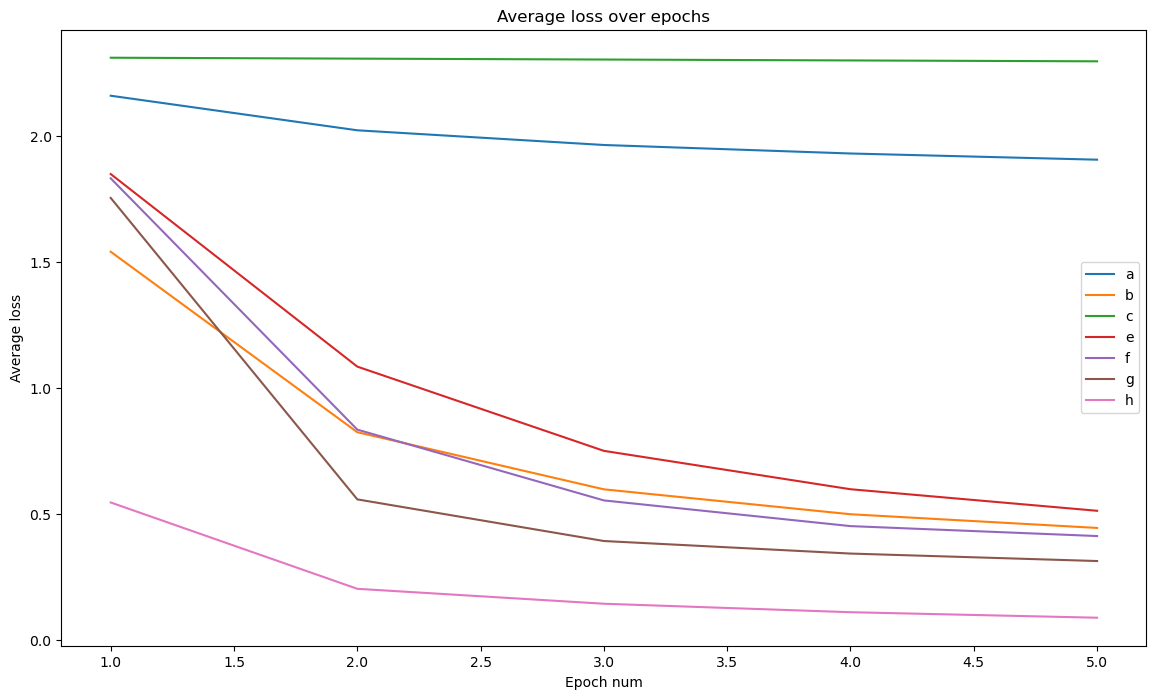

In [60]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.linspace(start=1, stop=5, num=5)

plt.figure(figsize=(14, 8))

plt.plot(epochs, avg_loss_epoch_a, label = 'a')
plt.plot(epochs, avg_loss_epoch_b, label='b')
plt.plot(epochs, avg_loss_epoch_c, label='c')
# plt.plot(epochs, avg_loss_epoch_d, label='d') # comentat ca are avg loss 40
plt.plot(epochs, avg_loss_epoch_e, label='e')
plt.plot(epochs, avg_loss_epoch_f, label='f')
plt.plot(epochs, avg_loss_epoch_g, label='g')
plt.plot(epochs, avg_loss_epoch_h, label='h')


plt.legend()
plt.title("Average loss over epochs")
plt.xlabel("Epoch num")
plt.ylabel("Average loss")

plt.show()
